In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

## Load dataset (X, y)

In [19]:
# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

## Build Regression Models

In [20]:
def build_model(activation='relu', optimizer='adam'):
    model = Sequential([
        Dense(64, activation=activation, input_shape=(X_train.shape[1],)),
        Dense(64, activation=activation),
        Dense(1)  # Linear activation (default) for regression
    ])
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

## Train and Evaluate Models

In [21]:
activations = ['relu', 'tanh']
optimizers = ['adam', 'sgd']
results = {}

for activation in activations:
    for opt in optimizers:
        print(f'\nTraining with activation={activation}, optimizer={opt}')
        model = build_model(activation=activation, optimizer=opt)
        
        history = model.fit(
            X_train_scaled, y_train,
            validation_data=(X_val_scaled, y_val),
            epochs=30,
            batch_size=32,
            verbose=0
        )
        
        # Evaluate on both train and validation sets
        train_pred = model.predict(X_train_scaled)
        val_pred = model.predict(X_val_scaled)

        train_mse = mean_squared_error(y_train, train_pred)
        val_mse = mean_squared_error(y_val, val_pred)
        train_mae = mean_absolute_error(y_train, train_pred)
        val_mae = mean_absolute_error(y_val, val_pred)
        
        results[f'{activation}_{opt}'] = {
            'Train MSE': train_mse,
            'Val MSE': val_mse,
            'Train MAE': train_mae,
            'Val MAE': val_mae,
            'History': history.history
        }


Training with activation=relu, optimizer=adam


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 

Training with activation=relu, optimizer=sgd


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 

Training with activation=tanh, optimizer=adam


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 

Training with activation=tanh, optimizer=sgd


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step 


## Compare Results

In [22]:
pd.DataFrame(results).T[['Train MSE', 'Val MSE', 'Train MAE', 'Val MAE']]

,Train MSE,Val MSE,Train MAE,Val MAE
relu_adam,0.264392,0.294628,0.356244,0.375056
relu_sgd,0.289033,0.301364,0.369674,0.377008
tanh_adam,0.274755,0.288575,0.360364,0.366537
tanh_sgd,0.320857,0.335925,0.398072,0.405244


## Plot Training Curves

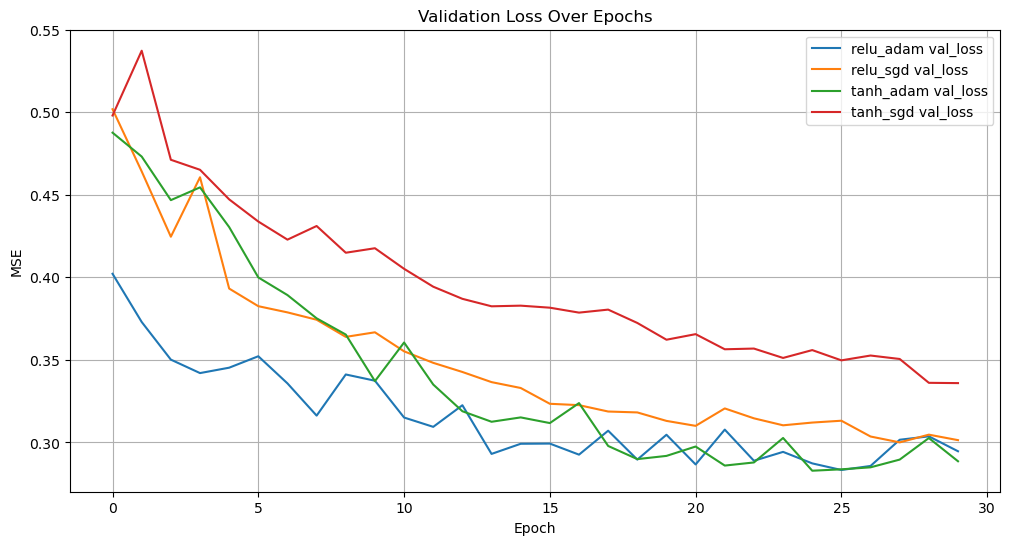

In [23]:
plt.figure(figsize=(12, 6))
for key, res in results.items():
    plt.plot(res['History']['val_loss'], label=f'{key} val_loss')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,803 (18.77 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [25]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression (linear activation)
])

C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

In [27]:
model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 97.5981 - mae: 2.5630 - val_loss: 1.7280 - val_mae: 1.0843
Epoch 2/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.5440 - mae: 0.9672 - val_loss: 1.4976 - val_mae: 0.9080
Epoch 3/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.6751 - mae: 0.9765 - val_loss: 1.3191 - val_mae: 0.9922
Epoch 4/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 8.9597 - mae: 1.4801 - val_loss: 3.6762 - val_mae: 1.5348
Epoch 5/5
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 11.9605 - mae: 1.6839 - val_loss: 1.3462 - val_mae: 0.9660
